# Use case: Machine learning
**Title: "What really effects PPG of NBA Players"**

*Robert Kurtz: Kaggle.com - June 2023*

Background/ Motivation:
* Practise hands on ML
* Finding dataset of interest of the author
* Work through complete process and different stages
* understand and vizualize the data
* evaluate for the most fitting algorithm/ model
* train to document and explain each step

## Step 0: Prerequisites

In [3]:
#importing all the relevant modules libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Importing the Data

In [4]:
df = pd.read_csv('/Users/robertkurtz/Desktop/NBA 2023 Dataplayground/data/2022-2023 NBA Player Stats - Regular.csv', delimiter=';', encoding='ISO-8859-1' )

In [5]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,0.697,2.1,4.3,6.4,1.1,0.7,0.7,1.2,2.2,10.4
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,0.806,2.7,7.3,10.1,3.3,1.2,0.8,2.6,2.8,21.6
3,4,Ochai Agbaji,SG,22,UTA,35,1,14.0,1.5,3.2,...,0.625,0.6,1.0,1.6,0.5,0.1,0.1,0.3,1.4,4.1
4,5,Santi Aldama,PF,22,MEM,52,18,22.0,3.4,7.0,...,0.730,1.0,3.7,4.7,1.2,0.7,0.7,0.7,1.9,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,501,Delon Wright,PG,30,WAS,26,2,22.1,2.1,5.1,...,0.903,0.9,2.2,3.1,3.7,1.9,0.3,0.8,1.4,6.0
549,502,McKinley Wright IV,PG,24,DAL,19,1,10.2,1.0,2.4,...,0.600,0.3,1.1,1.4,1.7,0.4,0.2,0.6,0.9,2.4
550,503,Thaddeus Young,PF,34,TOR,45,9,16.1,2.2,4.0,...,0.692,1.4,1.9,3.4,1.5,1.1,0.1,0.8,1.8,5.0
551,504,Trae Young,PG,24,ATL,50,50,35.5,8.5,19.8,...,0.887,0.7,2.3,3.0,10.2,1.0,0.2,4.2,1.5,26.9


**Dataset imported - The first descriptives...**

* There seem to be 552 players in the dataset
* The df consists of 30 columns in the data exploration we will have a close look on the features and the dependencies
* In the preprocessing the columns will be reduced and compensated to be prepared for the training
* *add more points...*



## Step 2: "Let the EDA begin"

### Parametrize the target

* Carsten showed me that it makes sense to introduce a variable that can be exchanged freely later on
* this variable will be called target variable and is the depending variable for the regression here PTS

In [15]:
# parametrize the target variable

target = 'PTS'

In [16]:
# Display summary statistics of numerical columns
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,...,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,251.726944,25.820976,34.269439,16.394213,19.760398,3.328933,7.091501,0.464937,0.994937,2.799096,...,0.688237,0.858409,2.661844,3.521338,2.042495,0.620253,0.366727,1.108318,1.692586,9.100362
std,144.832160,4.263359,17.436056,20.020916,10.109079,2.484137,5.161794,0.137788,0.917291,2.377959,...,0.255177,0.777682,1.853769,2.455314,1.937750,0.455468,0.390159,0.865064,0.845212,7.023418
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,127.000000,23.000000,21.000000,0.000000,12.000000,1.500000,3.200000,0.412000,0.200000,0.800000,...,0.657000,0.300000,1.300000,1.700000,0.700000,0.300000,0.100000,0.500000,1.100000,3.900000
50%,251.000000,25.000000,39.000000,5.000000,19.400000,2.700000,5.800000,0.457000,0.800000,2.300000,...,0.753000,0.700000,2.300000,3.000000,1.400000,0.600000,0.300000,0.900000,1.700000,7.200000
75%,377.000000,29.000000,49.000000,36.000000,28.700000,4.600000,9.700000,0.509000,1.500000,4.200000,...,0.838000,1.100000,3.500000,4.700000,2.800000,0.900000,0.500000,1.500000,2.200000,12.100000
max,505.000000,42.000000,59.000000,59.000000,38.000000,11.600000,22.800000,1.000000,4.900000,11.500000,...,1.000000,5.100000,9.900000,12.300000,10.800000,4.000000,3.300000,4.200000,5.000000,33.400000


* certainly not all the numerical columns make sense to look at such as the first one (ranking)
* average age of the nba players is 25,8 years old which is interesting --> could age have an effect on PPG?
* MP - Minutes Played will most certainly also have an effect on PPG...
* add more...

In [17]:
# I want to list all the columns (potential features) of my data
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [18]:
# Summary statistics of specific relevant columns
# print(df[['PTS', 'FGA', 'FG%', 'MP']].describe())

In [19]:
#Distribution of PTS along the dataset
print(df.PTS.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    553.000000
mean       9.100362
std        7.023418
min        0.000000
25%        3.900000
50%        7.200000
75%       12.100000
85%       16.920000
90%       20.180000
100%      33.400000
max       33.400000
Name: PTS, dtype: float64


### Top 10 Players

In [20]:
# Just to play a bit around and see how the best scorers perform across the columns I want to filter by TOP10 PPG

top_10_ppg = df.nlargest(10, 'PTS')
top_10_ppg

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
147,136,Joel Embiid,C,28,PHI,43,43,34.9,11.1,20.7,...,0.855,1.8,8.3,10.2,4.0,1.1,1.6,3.6,3.2,33.4
130,119,Luka Don?i?,PG,23,DAL,48,48,36.6,11.3,22.3,...,0.727,0.9,8.0,8.9,8.2,1.5,0.5,3.7,2.7,33.3
12,11,Giannis Antetokounmpo,PF,28,MIL,45,45,33.3,11.5,21.3,...,0.648,2.4,9.9,12.3,5.4,0.8,0.8,4.0,3.4,32.4
170,157,Shai Gilgeous-Alexander,PG,24,OKC,51,51,35.5,10.3,20.2,...,0.913,0.8,3.8,4.6,5.7,1.7,1.1,2.9,2.7,31.0
306,277,Damian Lillard,PG,32,POR,44,44,36.2,9.3,20.0,...,0.919,0.6,3.5,4.1,7.3,0.8,0.3,3.1,2.0,31.0
484,439,Jayson Tatum,PF,24,BOS,53,53,37.3,10.0,21.5,...,0.867,1.1,7.5,8.6,4.5,1.0,0.8,2.9,2.2,30.8
248,227,LeBron James,PF,38,LAL,44,44,36.4,11.6,22.8,...,0.764,1.2,7.3,8.5,7.0,1.0,0.5,3.1,1.6,30.2
141,130,Kevin Durant,PF,34,BRK,39,39,36.0,10.5,18.8,...,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7
111,102,Stephen Curry,PG,34,GSW,38,38,34.6,9.8,19.8,...,0.922,0.6,5.8,6.3,6.4,1.0,0.4,3.2,2.2,29.4
357,326,Ja Morant,PG,23,MEM,46,46,32.7,9.8,20.8,...,0.747,1.2,4.7,5.9,8.3,1.0,0.3,3.6,1.8,27.5


Luka Donic is written falsely I will correct it shortly:

In [21]:
# correcting a false name in "Player" column

rows_to_update = top_10_ppg[top_10_ppg['Player'] == 'Luka Don?i?']

# Update the player name
top_10_ppg.loc[rows_to_update.index, 'Player'] = 'Luka Doncic'
top_10_ppg


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
147,136,Joel Embiid,C,28,PHI,43,43,34.9,11.1,20.7,...,0.855,1.8,8.3,10.2,4.0,1.1,1.6,3.6,3.2,33.4
130,119,Luka Doncic,PG,23,DAL,48,48,36.6,11.3,22.3,...,0.727,0.9,8.0,8.9,8.2,1.5,0.5,3.7,2.7,33.3
12,11,Giannis Antetokounmpo,PF,28,MIL,45,45,33.3,11.5,21.3,...,0.648,2.4,9.9,12.3,5.4,0.8,0.8,4.0,3.4,32.4
170,157,Shai Gilgeous-Alexander,PG,24,OKC,51,51,35.5,10.3,20.2,...,0.913,0.8,3.8,4.6,5.7,1.7,1.1,2.9,2.7,31.0
306,277,Damian Lillard,PG,32,POR,44,44,36.2,9.3,20.0,...,0.919,0.6,3.5,4.1,7.3,0.8,0.3,3.1,2.0,31.0
484,439,Jayson Tatum,PF,24,BOS,53,53,37.3,10.0,21.5,...,0.867,1.1,7.5,8.6,4.5,1.0,0.8,2.9,2.2,30.8
248,227,LeBron James,PF,38,LAL,44,44,36.4,11.6,22.8,...,0.764,1.2,7.3,8.5,7.0,1.0,0.5,3.1,1.6,30.2
141,130,Kevin Durant,PF,34,BRK,39,39,36.0,10.5,18.8,...,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7
111,102,Stephen Curry,PG,34,GSW,38,38,34.6,9.8,19.8,...,0.922,0.6,5.8,6.3,6.4,1.0,0.4,3.2,2.2,29.4
357,326,Ja Morant,PG,23,MEM,46,46,32.7,9.8,20.8,...,0.747,1.2,4.7,5.9,8.3,1.0,0.3,3.6,1.8,27.5


### Worst 10 Players

In [22]:
# The same should also be possible for the "bench" players we might get rid of them later on

worst_10_ppg = df.nsmallest(10, 'PTS')
worst_10_ppg


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7,6,Nickeil Alexander-Walker,SG,24,MIN,1,0,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
47,44,Buddy Boeheim,PG,23,DET,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,66,Sterling Brown,SG,27,LAL,4,0,6.0,0.0,1.0,...,0.0,0.8,1.3,2.0,0.5,0.8,0.0,0.0,1.0,0.0
76,69,Thomas Bryant,C,25,DEN,1,0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,72,Deonte Burton,SG,29,SAC,2,0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,84,Julian Champagnie,SF,21,PHI,2,0,3.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
157,144,Michael Foster Jr.,PF,20,PHI,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,202,Malcolm Hill,SF,27,CHI,4,0,0.5,0.0,0.0,...,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,0.0
246,225,Quenton Jackson,PG,24,WAS,1,0,3.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
274,249,Frank Kaminsky,C,29,HOU,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It will be interesting if it makes sense to exclude the 0 PTS players from the regression... ?! (See in 02_data_preprocessing)

### Average Points by Position...

* using the groupby function

In [23]:
#average PTS by each position

average_pts_by_position = df.groupby('Pos')['PTS'].mean()
print(average_pts_by_position)

Pos
C         8.315534
PF        9.138462
PG       10.562385
SF        8.785859
SF-SG     9.600000
SG        8.733824
SG-PG     7.100000
Name: PTS, dtype: float64


Very interesting: Let's see if that also plays a role in the regression later on...

PG seem to score most on average!

* **PG       10.5**
* SG-PG:            7.1
* SG:               8.7
* SF-SG:            9.6
* SF:               8.7
* PF:               9.1
* C:                8.3

In the preprocessing to prepare for the regression, we will need to adjust this information by using "one hot encoding" 


## Average points by age

* let's see when a basketball player reaches his prime (statistically ;)

In [24]:
#average PTS by age

average_pts_by_age = df.groupby('Age')['PTS'].mean()
print(average_pts_by_age)

Age
19     5.971429
20     6.143333
21     7.930769
22     7.984783
23     8.287302
24     9.619608
25     7.500000
26    11.474419
27     9.740000
28    13.120833
29     8.910000
30    10.996552
31     9.476471
32    12.333333
33    11.672727
34    10.226667
35     6.571429
36     6.300000
37     6.900000
38    30.200000
39     2.300000
42     0.500000
Name: PTS, dtype: float64


* The result is actually really funny since there is one clear outlier of 38 years old with 30 PTS on average...

    *  This occurs because of our good friend *Mr Lebron James* who seems to be the only player in the set who is 38
    *  On average 28 years lead to the maximum (13.12PTS --> This is excluding Lebron james)

### Single player focus to understand how he generated his points

* To keep it more interesting we will be pulling from a pot "blind folded"...

In [25]:
import random

random_player = df.sample(n=1, random_state=random.seed())
#print(random_player)

# I want to be able to see all his stats

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Print the randomly selected player's information
print(random_player)

    Rk        Player Pos  Age   Tm   G  GS    MP   FG  FGA    FG%   3P  3PA  \
86  79  Clint Capela   C   28  ATL  41  39  26.9  5.4  8.6  0.626  0.0  0.0   

    3P%   2P  2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB   TRB  AST  STL  \
86  0.0  5.4  8.6  0.628  0.626  1.2  2.0  0.613  4.3  7.2  11.5  0.8  0.7   

    BLK  TOV   PF   PTS  
86  1.2  0.8  2.2  12.0  


### Interesting learning

The FG% is a mixture between 2P%, 3P%

Example Jimmy Butler = 3P% --> 0.297, 2P% --> 0.542



**Let's get the correct weight!:**

We need to substract the FT from the PTS to isolate the FG

(0.5*3)/(21.9-6.8) = 3P Weight = 0.09933774834437087

(6.7*2)/(21.9-6.8) = 2P Weight = 0.8874172185430466

Should sum up to 1 but doesn't... ?



##### --> Now we can calculate the FG% again:

(0.297 * 0.09933774834437087) + (0.542 * 0.8874172185430466) = **0.5104834437086094**

Almost correct...








### Having a first glimpse at the predictor variables

* we can see them again in Step 3

In [26]:
df_numerical = df.select_dtypes(include=["number"])
df_numerical


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,23,33,9,23.0,4.0,8.2,0.489,0.5,2.2,0.254,3.5,6.0,0.573,0.522,1.9,2.7,0.697,2.1,4.3,6.4,1.1,0.7,0.7,1.2,2.2,10.4
1,2,29,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,25,52,52,35.3,8.6,15.7,0.546,0.0,0.2,0.091,8.5,15.5,0.552,0.547,4.5,5.5,0.806,2.7,7.3,10.1,3.3,1.2,0.8,2.6,2.8,21.6
3,4,22,35,1,14.0,1.5,3.2,0.486,0.7,1.9,0.394,0.8,1.3,0.622,0.604,0.3,0.5,0.625,0.6,1.0,1.6,0.5,0.1,0.1,0.3,1.4,4.1
4,5,22,52,18,22.0,3.4,7.0,0.486,1.4,3.7,0.374,2.0,3.3,0.610,0.584,1.4,1.9,0.730,1.0,3.7,4.7,1.2,0.7,0.7,0.7,1.9,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,501,30,26,2,22.1,2.1,5.1,0.417,0.7,2.3,0.288,1.5,2.8,0.521,0.481,1.1,1.2,0.903,0.9,2.2,3.1,3.7,1.9,0.3,0.8,1.4,6.0
549,502,24,19,1,10.2,1.0,2.4,0.422,0.1,0.6,0.167,0.9,1.7,0.515,0.444,0.3,0.5,0.600,0.3,1.1,1.4,1.7,0.4,0.2,0.6,0.9,2.4
550,503,34,45,9,16.1,2.2,4.0,0.562,0.1,0.6,0.172,2.1,3.3,0.638,0.576,0.4,0.6,0.692,1.4,1.9,3.4,1.5,1.1,0.1,0.8,1.8,5.0
551,504,24,50,50,35.5,8.5,19.8,0.431,2.2,6.7,0.327,6.4,13.2,0.483,0.486,7.7,8.6,0.887,0.7,2.3,3.0,10.2,1.0,0.2,4.2,1.5,26.9


In [27]:
# correlation between the numerical columns and my target variable (PTS)
df_numerical.corr()[target].sort_values(ascending=False)

PTS     1.000000
FG      0.991608
FGA     0.980437
2PA     0.928527
2P      0.907904
FT      0.906800
FTA     0.886475
MP      0.876643
TOV     0.827871
AST     0.740013
3PA     0.730418
GS      0.728598
3P      0.715935
DRB     0.713095
TRB     0.639805
PF      0.589852
STL     0.578189
G       0.492356
FT%     0.433722
BLK     0.367023
ORB     0.319441
3P%     0.250959
eFG%    0.151880
FG%     0.139241
Age     0.131549
2P%     0.112377
Rk     -0.048703
Name: PTS, dtype: float64

## Step 3: Possible Visualizations

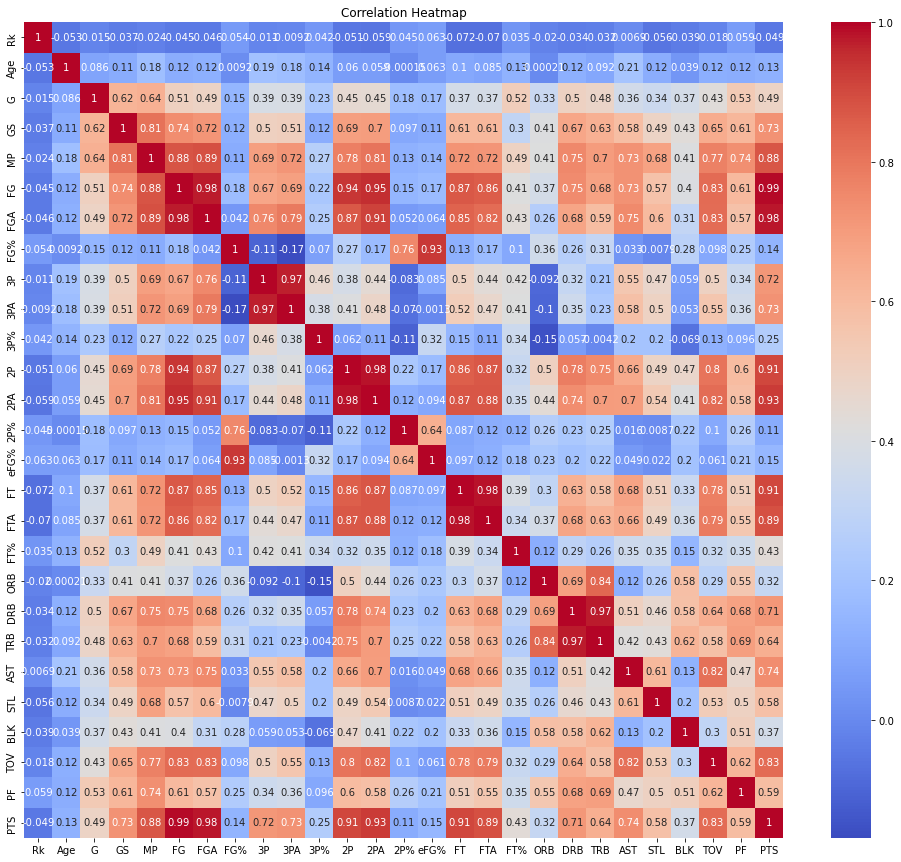

In [28]:
# Filter numerical columns only
df_numerical = df.select_dtypes(include=['number'])

# Perform correlation analysis
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(17, 15))   # Needs to fit the screen well and can be adjusted
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

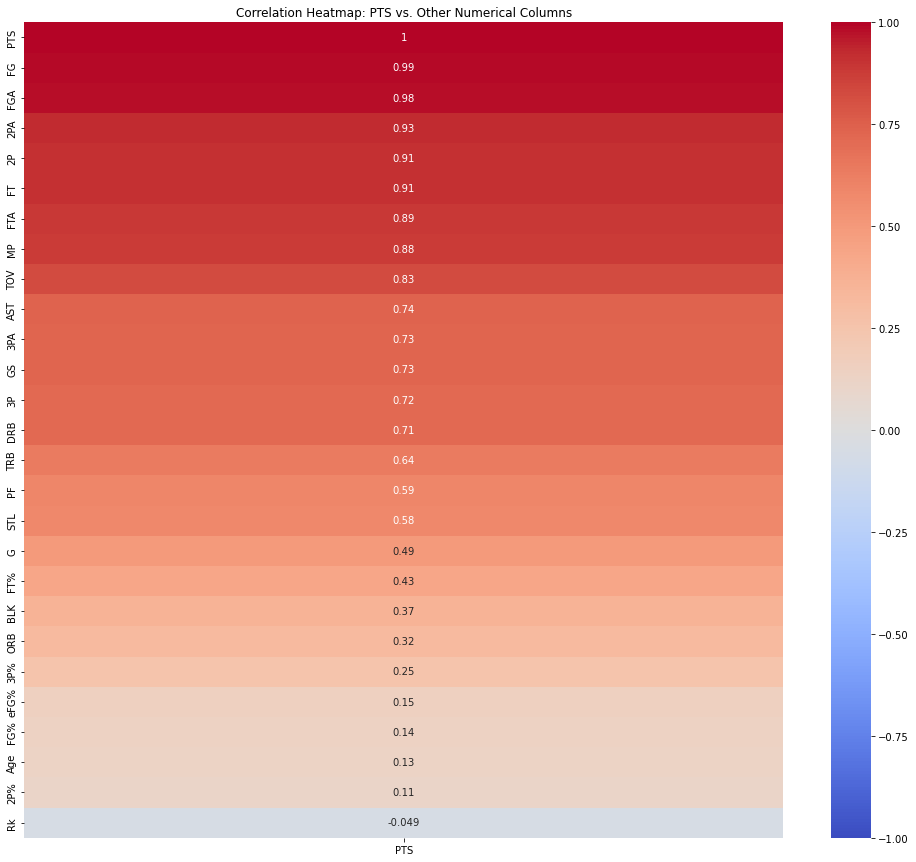

In [29]:
# Compute correlation with 'PTS' column
correlation_with_pts = df_numerical.corr()['PTS']

# Sort correlation values in descending order (highest to lowest)
correlation_with_pts = correlation_with_pts.sort_values(ascending=False)

# Keep only the correlation values related to 'PTS' column
correlation_matrix = df_numerical[correlation_with_pts.index].corr()

# Create heatmap for 'PTS' correlation
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix[['PTS']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: PTS vs. Other Numerical Columns')
plt.show()